### Problem statment

Let's suppose, thzt some object - victim has constant trajectiory. Next, there is an other object - hunter. The goal of hunter is to watch the victim. More specificly to be on a given target distance from victim with given a accuracy.
Hunter problem is that he knows restricted amount of information:

1. Is hunter close in on the victim: $\{0,1\}$

2. Is hunter on target distance with given accuracy: $\{0,1\}$

3. Dirrection of victim velocity $v_{v}$: $\frac{v_{v}}{||v_{v}||}$

4. Dirrection of hunter velocity $v_{v}$: $\frac{v_{h}}{||v_{h}||}$

5. Hunter force: $f_{h}$

In descrete time case hunter will have the following information:

1. Is hunter close in on the victim: $h\left(\left|\left|x_{h}^{-1}-x_{v}^{-1}\right|\right|-\left|\left|x_{h}^0-x_{v}^0\right|\right|\right)$

2. Is hunter on target distance $d_t$ with given accuracy $e_t$: $h \left(\left|\,\left|\left|x_{h}^0-x_{v}^0\right|\right|-d_t \,\right|- e_t\right)$

3. Dirrection of victim velocity: $\frac{x_{v}^0 - x_{v}^{-1}}{||x_{v}^0 - x_{v}^{-1}||}$

3. Dirrection of hunter velocity: $\frac{x_{h}^0 - x_{h}^{-1}}{||x_{h}^0 - x_{h}^{-1}||}$

4. Hunter force: $f_{h}^{-1}$

### Environment

### Hunter policy

Since hunter may moove only with speed constrained by some constant, we need to
constrain action space. Let's define max speed as $v_{max}$.
We may define our distribution via some function $G(x)$ from simple normal distribution $\mathcal{N}(x|\mu,diag(e^{2 s}))$.
Let's define function $g(x)$ so, that it was constrained in circle with radius $v_{max}$:
$$
G(x) = v_{max}\frac{x}{||x||_2}e^{-||x||_2^2} 
$$

$$\nabla_x\left[\textbf{f}(x)g(x)\right] = \frac{d\textbf{f}(x)}{dx}g(x)+\frac{dg(x)}{dx} \textbf{f}(x)^T $$

$$ \nabla_x G(x) =v_{max} \left( \frac{e^{-||x||_2^2}}{||x||_2} I + \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]x^T\right) $$

$$ \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]\nabla_x||x||_2$$

$$\nabla_x||x||_2 = \frac{x}{||x||_2}$$
$$  \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = -\left[\frac{1}{||x||_2^2}+2\right]e^{-||x||_2^2}$$

$$ \nabla_x G(x) =v_{max}\frac{e^{-||x||_2^2}}{||x||_2} \left(I -\left[\frac{1}{||x||_2^2}+2\right] x x^T\right)  $$

$$\mathcal{J}_{G(x)}=-\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n \left(1-\left[\frac{1}{||x||_2^2}+2\right]||x||_2^2 \right) = 2\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n ||x||_2^2 $$

for 2 dimentions:
$$\mathcal{J}_{G(x)}=2 v_{max}^2 e^{-2||x||_2^2}$$

$$\ln(\mathcal{J}_{G(x)}^{-1})=2\left(||x||_2^2-\ln v_{max}\right)-\ln 2$$

So, PDF of distribution rv G(x) may be estimated as following:
$$\mathcal{N}(x|\mu,diag(e^{2s}))J_{G(x)}^{-1}$$

In [1]:
import torch
from policy import HunterPolicy, VictimPolicy
from environment import ForceHunterEnvironment

from train import train
%matplotlib inline

env = ForceHunterEnvironment(VictimPolicy.ellipse_victim_policy)
policy = HunterPolicy(env,max_action=3)

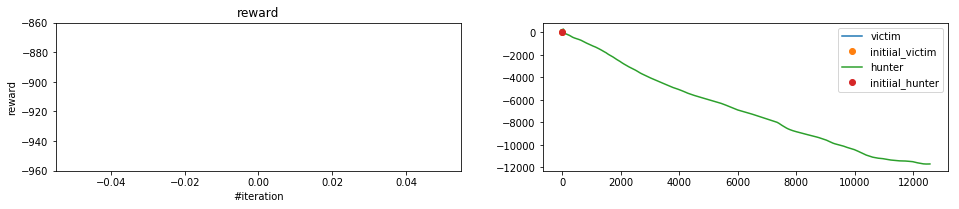

Episode 0	Last length:   999	Last reward: -910.00


KeyboardInterrupt: 

In [2]:
train(policy,env,100000,learning_rate=0.0001)

In [2]:
policy = torch.load('force_policy_ellipse_max_action_3.p')

In [5]:
torch.save(policy,'new_force_policy_ellipse_max_action_3.p')
policy = torch.load('new_force_policy_ellipse_max_action_3.p')

### Test Visualization

<IPython.core.display.Javascript object>


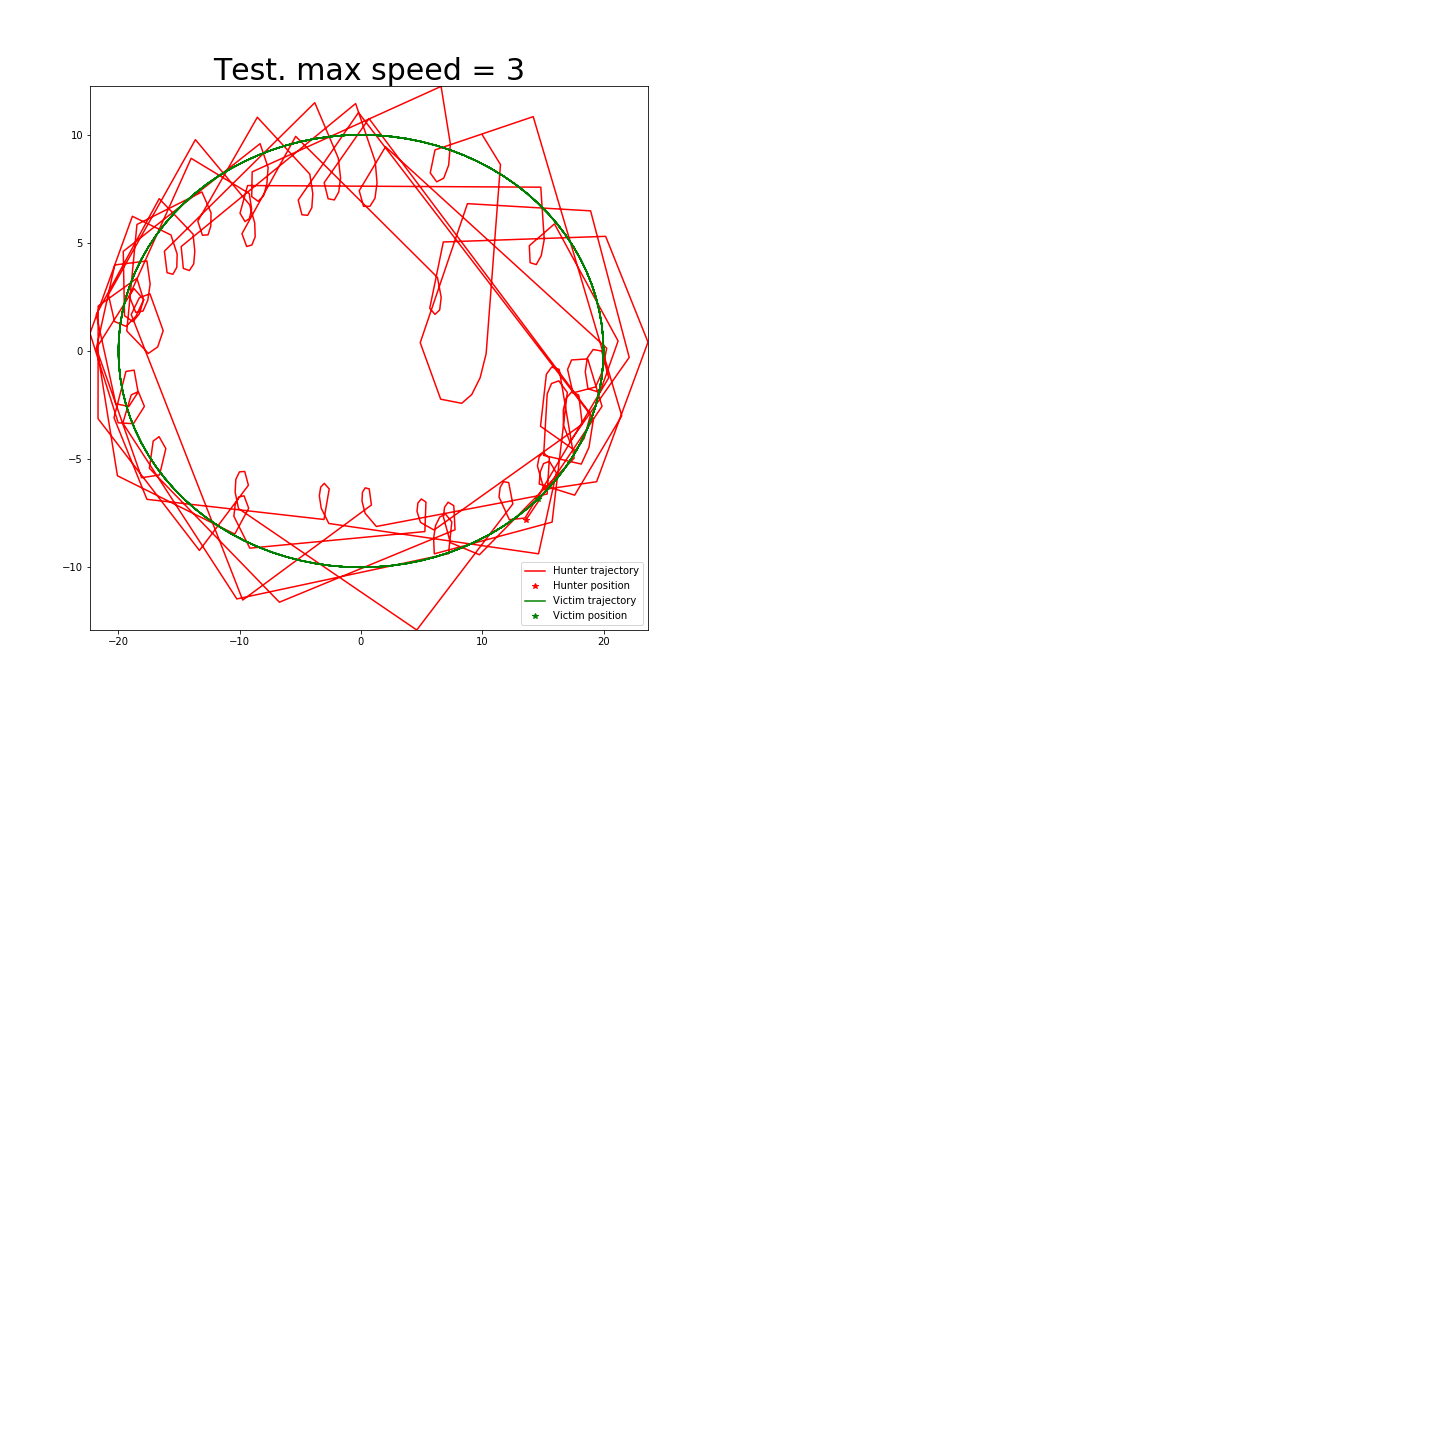

In [ ]:
from visualization import model_hunter_learning
%matplotlib notebook


model_hunter_learning('Test. max speed = 3',policy,env,hunter_start_position=[10,10])